In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp

# Optimización 

In [2]:
from scipy.optimize import minimize

In [7]:
def f(x): return (x-3)**2

#Se asigna un valor inicial
res = minimize(f, 2)
res.x

array([2.99999999])

Cuando se dan restricciones siempre tienen que ser mayores o iguales a cero; $\geq 0$

Minimizar la función: \ $ f(x,y)= (x-1)^2 + (y-2.5)^2$

Con las siguientes restricciones: 

$x - 2y + 2 \geq 0$

$-x - 2y + 6 \geq 0$

$-x + 2y + 2 \geq 0$

$x\geq 0$

$y \geq 0$ 

In [14]:
f = lambda x:(x[0]-1)**2 + (x[1]-2.5)**2

#Estas son las primeras restricciones que se tienen 
#Se tienen que dar de esta forma para que el programa pueda hacerlo
cons = (
    {"type":"ineq", "fun": lambda x: x[0] - 2*x[1] + 2},
    {"type":"ineq", "fun": lambda x: -x[0] - 2*x[1] + 6},
    {"type":"ineq", "fun": lambda x: -x[0] + 2*x[1] + 2}
       )

#Estas son las restricicones para las cuales x >= 0 e y>=0
bns = ((0,None),(0,None))


res = minimize(f, (2,0), bounds = bns, constraints = cons)
res.x

array([1.4, 1.7])

# Interpolación

Supongamos que se tiene una serie de datos experimentales, lo que se pretende hacer es aproximar una curva a éstos.

Este método sirve más para ajustar polinominos de a lo más grado 3.

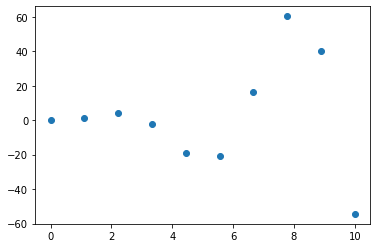

In [17]:
x = np.linspace(0,10,10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

In [21]:
#Es: interp/uno/d
from scipy.interpolate import interp1d

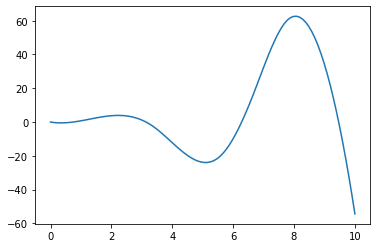

In [29]:
f = interp1d(x,y, kind="cubic")

x_new = np.linspace(0,10,100)
plt.plot(x_new,f(x_new))

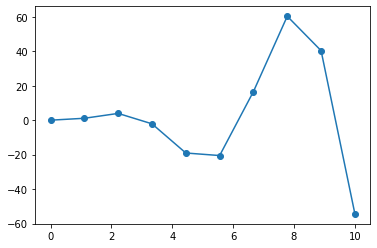

In [34]:
f = interp1d(x,y)

x_new = np.linspace(0,10,100)
plt.plot(x_new,f(x_new))
plt.scatter(x,y)

# Curve fitting

Este método nos sirve cuando sabemos cómo se pueden comportar los datos

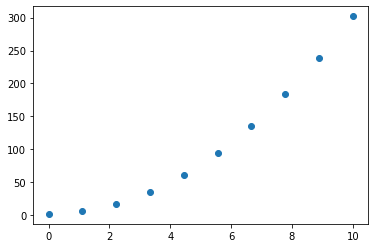

In [39]:
x_data = np.linspace(0,10,10)
y_data = 3*x_data**2 + 2
plt.scatter(x_data,y_data)

Quiero ajustar una curva que es de la forma $y = ax +b$. 

Lo que este método hace es darnos los mejores valores para los parámetros $a$ y $b$.

In [40]:
from scipy.optimize import curve_fit

In [43]:
def f(x,a,b):
    return a*x**2 + b

#para obtener los parámetros hacemos: 

p,q = curve_fit(f,x_data,y_data,p0=(0,0))

In [44]:
p

array([3., 2.])

## Ejemplo

Estos son los datos que se obtienen en un laboratorio


In [ ]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

Los datos del laboratorio se muestran: 

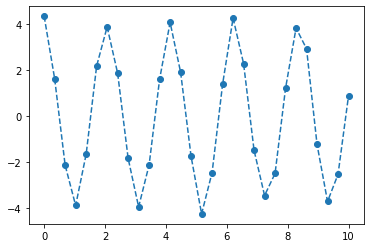

In [48]:
plt.plot(t_data,y_data,"o--")

Sabemos que una función que ajusta a nuestros datos es: 

$f(x) = A \ Cos( \omega x + \phi)$

El objetivo es encontrar los valores $A$, $\omega$ y $phi$.

In [52]:
def func(x,A,omega,phi): return A*np.cos(omega*x + phi)

solution = curve_fit(func,t_data,y_data,p0=(0,np.pi,0))
solution[0]

array([3.94836217, 2.99899525, 0.1041133 ])

In [54]:
A,omega,phi = solution[0]

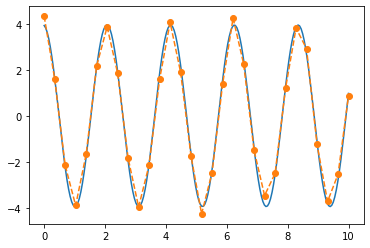

In [63]:
new_t = np.linspace(0,10,200)
new_y = func(new_t,A,omega,phi)

plt.plot(new_t,new_y)
plt.plot(t_data, y_data,"o--") 

El error en cada parámetro se encuentra como: 

In [64]:
np.sqrt(np.diag(solution[1]))

array([0.05117448, 0.00430857, 0.02575702])

# Derivación

In [2]:
from scipy.misc import derivative

In [4]:
def f(x): return x**2 * np.sin(2*x) *np.exp(-x)

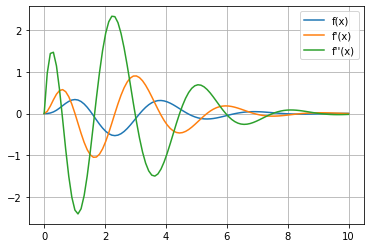

In [14]:
x = np.linspace(0,10,100)
#Así se calcula la primera derivada numérica
f_prima = derivative(f, x, dx=1e-6)
#Esta es la segunda derivada numérica
f_biprima = derivative(f, x, dx=1e-6, n=2)


plt.plot(x, f(x), label = "f(x)")
plt.plot(x, f_prima, label = "f'(x)")
plt.plot(x, f_biprima, label = "f''(x)")
plt.grid()
plt.legend()
plt.show()

# Integración

In [19]:
#Integrales en una dimensión
from scipy.integrate import quad

In [18]:
integrand = lambda x: x**2 *np.sin(2*x)*np.exp(-x)
integral, error = quad(integrand, 0,1)
integral

0.14558175869954834

In [20]:
#Integrales dobles
from scipy.integrate import dblquad

In [22]:
integrand = lambda y,x: np.sin(x + y**2) 
lw_y = lambda x:-x
up_y = lambda x: x
integral, error = dblquad(integrand, 0,1,lw_y,up_y)
integral

0.6888721033293499

# Ecuaciones diferenciales 

## $v' - \alpha v^2 + \beta = 0 $

$v(0)=0$

In [6]:
from scipy.integrate import odeint 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Damos la información de la EDO
#Se tiene que despejar la ecuación, para que de un lado quede dv/dt = bla bla
def dvdt(v,t): 
    return 3*v**2 - 5

#Esta es la condición inicial
v0 = 0

In [5]:
t = np.linspace(0,1,100)
sol = odeint(dvdt, v0, t)

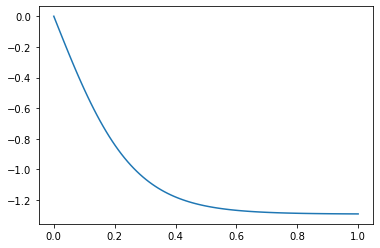

In [7]:
plt.plot(t, sol.T[0])

# Sistemas de ecuaciones acopladas

$y_{1}' = y_1 + y_{2}^{2} + 3x $ 

$y_{2}' = 3y_1 + y_{2}^{3} - cos(x) $ 

$y_{1}(0)= 0$

$y_{2}(0)= 0$

In [10]:
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2**2 + 3*x, 
           3*y1 + y2**3 - np.cos(x)]

y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [11]:
x = np.linspace(0,1,100)
sol = odeint(dSdx, S_0, x)

In [19]:
y1 = sol[:,0]
y2 = sol[:,1]

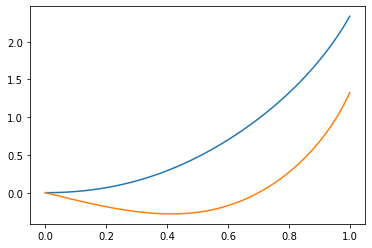

In [21]:
plt.plot(x, y1)
plt.plot(x,y2)

# Ecuaciones de segundo grado.


Para que python pueda resolver estas ecuaciones, es necesario que transformemos la ecuación de segundo grado, en dos ecuaciones de primer grado.

## $\theta '' - sin(\theta) = 0$

In [24]:
def dSdt(S, t):
    theta, omega = S
    return [omega, 
           np.sin(theta)]

theta0 = np.pi /4
omega0 = 0
S_0 = (theta0, omega0)

In [30]:
t = np.linspace(0,20,100)
sol = odeint(dSdt, S_0, t)

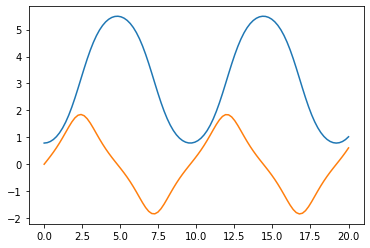

In [33]:
theta = sol[:,0]
omega = sol[:,1]

plt.plot(t, theta)
plt.plot(t, omega)

## Un ejemplo cool

La ley de enfriamento de Newton dice: $ \displaystyle\frac{dT}{dt} = -k (T - T(s))$. 

En donde $T$ es la temperatura de un objeto y la temperatura de los alrededores es $T(s)$. 

Supongamos que $T$ representa la temperatura del agua de una piscina poco profunda y $T_s$ representa la temperatura del exterior. 

Encontrar $T(t)$ dados los siguientes datos recolectados.

In [64]:
#Este es el intervalo de tiempo de donde se obtuvieron las temperaturas
t_m = np.array([ 0.,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ])

#Este es valor de las temperaturas que se obtuvieron para la piscina, dado el tiempo anterior
temp_m = np.array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
       291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
       302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
       298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
       287.8603625, 286.2259041, 284.6945461, 283.2322975])

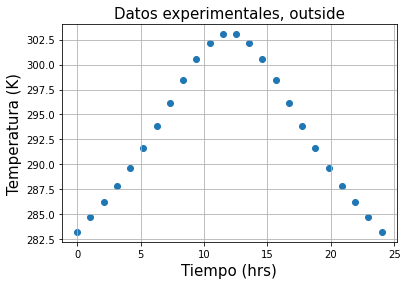

In [43]:
plt.scatter(t_m, temp_m)
plt.title("Datos experimentales, outside", fontsize=15)
plt.xlabel("Tiempo (hrs)", fontsize=15)
plt.ylabel("Temperatura (K)", fontsize =15)
plt.grid()

In [54]:
#La temperatura de la psicina es Ts y se encuentra como sigue
from scipy.interpolate import interp1d
Ts = interp1d(t_m, temp_m)

In [55]:
#Definimos la ecuación diferencial 
def dTdt(T, t):
    return -0.5*(T-Ts(t))

t0 = 282.5

In [62]:
#Resolvemos la ecuación diferencial
t = np.linspace(0,23, 1000)
sol = odeint(dTdt, t0, t)

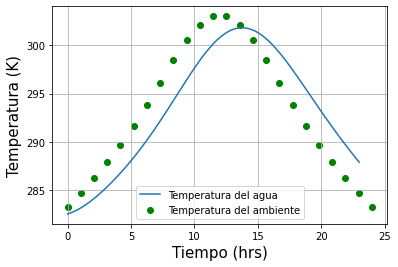

In [71]:
plt.plot(t, sol[:,0], label = "Temperatura del agua")
plt.scatter(t_m, temp_m, color = "g", label = "Temperatura del ambiente")
plt.xlabel("Tiempo (hrs)", fontsize=15)
plt.ylabel("Temperatura (K)", fontsize =15)
plt.grid()
plt.legend()
plt.show()